In [1152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1135]:
df = pd.read_csv("Admission_Predict.csv", header=None)
df = df.iloc[1:]
df = df.drop(columns=df.columns[0])
df.insert(0, '0', 1)
df = df.apply(pd.to_numeric, errors='coerce')
admission_dataset = df.to_numpy()

In [1136]:
columns_to_normalize = admission_dataset[:, 1:8]
min_vals = columns_to_normalize.min(axis=0)
max_vals = columns_to_normalize.max(axis=0)
normalized_columns = (columns_to_normalize - min_vals) / (max_vals - min_vals)
first_column = admission_dataset[:, 0].reshape(-1, 1)
normalized_columns = np.concatenate((np.concatenate((first_column, normalized_columns), axis=1), admission_dataset[:, 8:]), axis=1)

np.random.seed(77)
shuffled_dataset = np.random.permutation(normalized_columns)
train_ratio = 0.8
train_size = int(train_ratio * shuffled_dataset.shape[0])
training_data = shuffled_dataset[:train_size]
test_data = shuffled_dataset[train_size:]

X_train = training_data[:, :-1]
Y_train = training_data[:, -1]
Y_train = Y_train.reshape(train_size, 1)
X_test = test_data[:, :-1]
Y_test = test_data[:, -1]
Y_test = Y_test.reshape(X_test.shape[0], 1)

In [1137]:
def batch_gradient_descent(X, y, alpha, tolerance):
    n_samples, n_features = X.shape
    theta = np.random.rand(n_features, 1)
    loss_history = []
    prev_theta = np.copy(theta)

    while True:
        y_pred = X.dot(theta)
        gradient = -2 * X.T.dot(y - y_pred) / n_samples
        theta -= alpha * gradient
        mse = np.mean((y_pred - y) ** 2)
        loss_history.append(mse)
        
        if np.linalg.norm(theta - prev_theta) < tolerance:
            break
        
        prev_theta = np.copy(theta)
    
    return theta, loss_history

In [1138]:
def mini_batch_gradient_descent(X, y, alpha, tolerance, batch_size):
    n_samples, n_features = X.shape
    theta = np.random.rand(n_features, 1)
    loss_history = []
    num_batches = n_samples // batch_size
    prev_theta = np.copy(theta)
    
    while True:
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        total_loss = 0.0 
        
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            y_pred = X_batch.dot(theta)
            gradient = -2 * X_batch.T.dot(y_batch - y_pred) / batch_size
            theta -= alpha * gradient
            mini_batch_loss = np.mean((y_pred - y_batch) ** 2)
            total_loss += mini_batch_loss
        
        avg_epoch_loss = total_loss / num_batches
        loss_history.append(avg_epoch_loss)
        
        if np.linalg.norm(theta - prev_theta) < tolerance:
            break
        
        prev_theta = np.copy(theta)
    
    return theta, loss_history

In [1139]:
def stochastic_gradient_descent(X, y, alpha, tolerance):
    n_samples, n_features = X.shape
    theta = np.random.rand(n_features, 1)  
    loss_history = []
    prev_theta = np.copy(theta)  
    
    while True:
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        total_loss = 0.0
        
        for i in range(n_samples):
            X_i = X_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]
            y_pred = X_i.dot(theta)
            gradient = -2 * X_i.T.dot(y_i - y_pred)
            theta -= alpha * gradient
            sample_loss = np.mean((y_pred - y_i) ** 2)
            total_loss += sample_loss
        
        avg_epoch_loss = total_loss / n_samples
        loss_history.append(avg_epoch_loss)
        
        if np.linalg.norm(theta - prev_theta) < tolerance:
            break
        
        prev_theta = np.copy(theta)
    
    return theta, loss_history

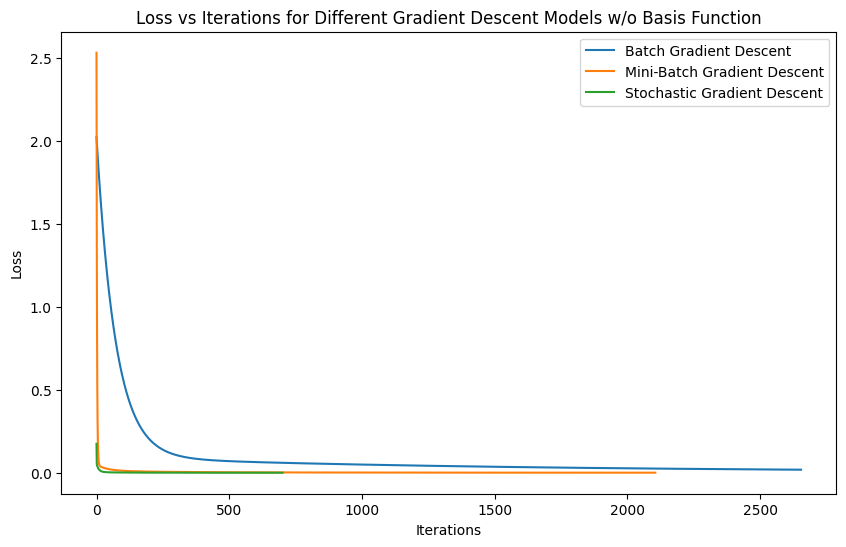

MSE for Test Dataset for Batch Gradient Descent: 0.021881350701907935
MSE for Test Dataset for Mini-Batch Gradient Descent: 0.0034762438038199285
MSE for Test Dataset for Stochastic Gradient Descent: 0.003291705520112469


In [1140]:
theta_batch, loss_history_batch = batch_gradient_descent(X_train, Y_train, 0.001, 1e-4)
theta_mini_batch, loss_history_mini_batch = mini_batch_gradient_descent(X_train, Y_train, 0.001, 1e-4, batch_size=10)
theta_stochastic, loss_history_stochastic = stochastic_gradient_descent(X_train, Y_train, 0.001, 1e-4)

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history_batch)), loss_history_batch, label='Batch Gradient Descent')
plt.plot(range(len(loss_history_mini_batch)), loss_history_mini_batch, label='Mini-Batch Gradient Descent')
plt.plot(range(len(loss_history_stochastic)), loss_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations for Different Gradient Descent Models w/o Basis Function')
plt.legend()
plt.show()

y_pred_test = X_test.dot(theta_batch)
mse_test = np.mean((y_pred_test - Y_test) ** 2)
print("MSE for Test Dataset for Batch Gradient Descent:", mse_test)

y_pred_test_mini_batch = X_test.dot(theta_mini_batch)
mse_test_mini_batch = np.mean((y_pred_test_mini_batch - Y_test) ** 2)
print("MSE for Test Dataset for Mini-Batch Gradient Descent:", mse_test_mini_batch)

y_pred_stochastic_test = X_test.dot(theta_stochastic)
mse_test_stochastic = np.mean((y_pred_stochastic_test - Y_test) ** 2)
print("MSE for Test Dataset for Stochastic Gradient Descent:", mse_test_stochastic)

In [1141]:
theta_batch = theta_batch[1:, :]
theta_mini_batch = theta_mini_batch[1:, :]
theta_stochastic = theta_stochastic[1:, :]
feature_names = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"]

In [1142]:
batch_df = pd.DataFrame({"Batch Features": feature_names, "Weight": theta_batch[:, 0]}, index = None)
batch_df

,Batch Features,Weight
0,GRE Score,-0.159318
1,TOEFL Score,0.346270
2,University Rating,0.098878
3,SOP,0.251365
4,LOR,0.063326
5,CGPA,0.210231
6,Research,0.221951


In [1143]:
mini_batch_df = pd.DataFrame({"Mini Batch Features": feature_names, "Weight": theta_mini_batch[:, 0]}, index = None)
mini_batch_df

,Mini Batch Features,Weight
0,GRE Score,0.079616
1,TOEFL Score,0.180147
2,University Rating,0.030120
3,SOP,0.015239
4,LOR,0.080227
5,CGPA,0.242509
6,Research,0.023932


In [1144]:
stochastic_df = pd.DataFrame({"Stochastic Features": feature_names, "Weight": theta_stochastic[:, 0]}, index = None)
stochastic_df

,Stochastic Features,Weight
0,GRE Score,0.124034
1,TOEFL Score,0.075572
2,University Rating,0.034185
3,SOP,-0.003412
4,LOR,0.078733
5,CGPA,0.330488
6,Research,0.020319


In [1145]:
def compute_euler_features(X):
    return np.exp(0.75 * X)

In [1146]:
one_train = X_train[:, 0]
one_train = one_train.reshape(X_train.shape[0], 1)
X_train_temp = X_train[:, 1:8]

one_test = X_test[:, 0]
one_test = one_test.reshape(X_test.shape[0], 1)
X_test_temp = X_test[:, 1:8]

X_train_euler = compute_euler_features(X_train_temp)
X_test_euler = compute_euler_features(X_test_temp)

X_train = np.concatenate((one_train, X_train_euler), axis=1)
X_test = np.concatenate((one_test, X_test_euler), axis=1)

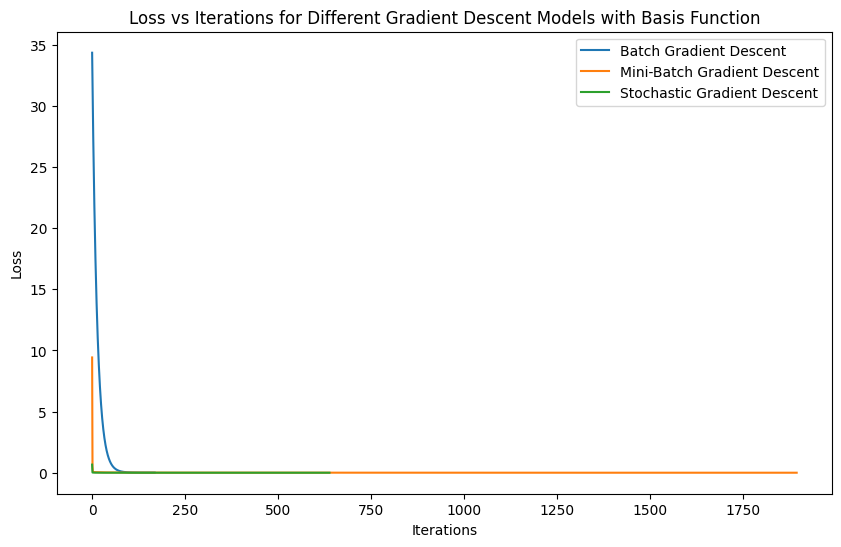

MSE for Test Dataset for Batch Gradient Descent: 0.01179344858767355
MSE for Test Dataset for Mini-Batch Gradient Descent: 0.0035804568711443434
MSE for Test Dataset for Stochastic Gradient Descent: 0.003482150237586458


In [1147]:
theta_batch, loss_history_batch = batch_gradient_descent(X_train, Y_train, 0.001, 1e-4)
theta_mini_batch, loss_history_mini_batch = mini_batch_gradient_descent(X_train, Y_train, 0.001, 1e-4, batch_size=10)
theta_stochastic, loss_history_stochastic = stochastic_gradient_descent(X_train, Y_train, 0.001, 1e-4)

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history_batch)), loss_history_batch, label='Batch Gradient Descent')
plt.plot(range(len(loss_history_mini_batch)), loss_history_mini_batch, label='Mini-Batch Gradient Descent')
plt.plot(range(len(loss_history_stochastic)), loss_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations for Different Gradient Descent Models with Basis Function')
plt.legend()
plt.show()

y_pred_test = X_test.dot(theta_batch)
mse_test = np.mean((y_pred_test - Y_test) ** 2)
print("MSE for Test Dataset for Batch Gradient Descent:", mse_test)

y_pred_test_mini_batch = X_test.dot(theta_mini_batch)
mse_test_mini_batch = np.mean((y_pred_test_mini_batch - Y_test) ** 2)
print("MSE for Test Dataset for Mini-Batch Gradient Descent:", mse_test_mini_batch)

y_pred_stochastic_test = X_test.dot(theta_stochastic)
mse_test_stochastic = np.mean((y_pred_stochastic_test - Y_test) ** 2)
print("MSE for Test Dataset for Stochastic Gradient Descent:", mse_test_stochastic)

In [1148]:
theta_batch = theta_batch[1:, :]
theta_mini_batch = theta_mini_batch[1:, :]
theta_stochastic = theta_stochastic[1:, :]
feature_names = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"]

In [1149]:
batch_df = pd.DataFrame({"Batch Features": feature_names, "Weight": theta_batch[:, 0]}, index = None)
batch_df

,Batch Features,Weight
0,GRE Score,0.130259
1,TOEFL Score,0.117743
2,University Rating,-0.210601
3,SOP,-0.335792
4,LOR,0.264036
5,CGPA,0.488789
6,Research,0.049555


In [1150]:
mini_batch_df = pd.DataFrame({"Mini Batch Features": feature_names, "Weight": theta_mini_batch[:, 0]}, index = None)
mini_batch_df

,Mini Batch Features,Weight
0,GRE Score,0.169549
1,TOEFL Score,-0.021869
2,University Rating,0.024218
3,SOP,0.018086
4,LOR,0.056117
5,CGPA,0.300045
6,Research,0.016265


In [1151]:
stochastic_df = pd.DataFrame({"Stochastic Features": feature_names, "Weight": theta_stochastic[:, 0]}, index = None)
stochastic_df

,Stochastic Features,Weight
0,GRE Score,0.091371
1,TOEFL Score,0.065136
2,University Rating,0.029387
3,SOP,0.001871
4,LOR,0.061803
5,CGPA,0.297071
6,Research,0.019975
